# <A1_퍼포먼스_팩토리_마케팅_광고_최적화>

## [배경] 


## [주제]
광고 마케팅 최적화 알고리즘 모델링

## [설명]




# [데이셋 정보]

### 1. bidding_result_adding.csv [파일] 


### 2. log_csv.csv [파일]


### 3. 결론



데이터를 확인한 결과는 다음과 같습니다.

index = 48896

Impression = 2734

Click = 189

Cost = 2406

Sum of AD rank = 99529

Bid = 286

Price(PC) = 7516

Price(Mobile) = 7516

Delivery Fee = 116

Category Name 1 = 10

Category Name 2 = 126

Category Name 3 = 545

Category Name 4 = 734

date = 57 [2022.10.31~2023.01.03]


       

# 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인

Advertiser : 광고주
광고의 주체로서 광고비용을 부담하는 조직체 또는 개인을 말함.

Advertising : 광고
확인 가능한 광고주가 다양한 매체를 통해, 제품이나 서비스 또는 아이디어에 관해 통상적으로 유료이며 대개는 설득적인 정보의 비대인적인 커뮤니케이션활동을 말함.

광고주 [advertiser]란 광고활동 하는 주체자를 말하는 것으로, 광고활동에는 광고대행사와 매체가 관련되기 때문에 이들과 구별하는 뜻에서 광고주라고 합니다.

대체로 광고주는 광고 계획안의 기본을 작성한 뒤 표현 ·매체 ·제작 등과 관련되는 일체의 일을 광고대행사에 맡기게 됩니다.

광고대행사 쪽에서 보면 광고주는 고객이므로 클라이언트(client)라고 합니다. 광고주를 스폰서라고 표현하기도 하지만, 이 표현은 대개 전파매체 광고주인 경우에 쓰이는 말입니다.


<입찰=bid>




In [ ]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures



# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# A1 퍼포먼스 팩토리 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/A1_퍼포먼스 팩토리 with 김재승/"

bidding = pd.read_csv(base_path + "bidding_results_adding.csv", encoding="utf-8" )
log = pd.read_csv(base_path + "log_csv.csv",  encoding="utf-8")


# 2. EDA 


# 데이터 살펴보기 기술통계

In [ ]:
bidding.head(10)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031
6,4158472,138,2,270.0,4.420290,240,129000,129000,0,가구/인테리어,아동/주니어가구,책장,NaN,20221031
7,4159062,60,1,50.0,10.366667,50,699000,699000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
8,4159064,8,0,0.0,9.625000,50,169000,169000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
9,4159066,76,3,640.0,5.421053,250,149000,149000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031


In [ ]:
bidding.tail(10)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
1337078,2566230,85,2,860.0,1.611765,500,36800,36800,0,생활/건강,욕실용품,수건/타월,세면타월,20230103
1337079,2566332,16,1,260.0,1.937500,500,17900,17900,0,생활/건강,청소용품,휴지통,다용도휴지통,20230103
1337080,2566781,10,0,0.0,2.000000,500,7800,7800,3000,생활/건강,문구/사무용품,카드/엽서/봉투,엽서,20230103
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,생활/건강,문구/사무용품,다이어리/플래너,다이어리,20230103
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103
1337087,2566923,14,0,0.0,12.428571,500,128800,128800,0,가구/인테리어,인테리어소품,액자,퍼즐/그림/사진액자,20230103


In [4]:
bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337088 entries, 0 to 1337087
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1337088 non-null  int64  
 1   Impression       1337088 non-null  int64  
 2   Click            1337088 non-null  int64  
 3   Cost             1337088 non-null  float64
 4   Sum of AD rank   1337078 non-null  float64
 5   Bid              1337088 non-null  int64  
 6   Price(PC)        1337088 non-null  int64  
 7   Price(Mobile)    1337088 non-null  int64  
 8   Delivery Fee     1337088 non-null  int64  
 9   Category Name 1  1337088 non-null  object 
 10  Category Name 2  1337088 non-null  object 
 11  Category Name 3  1331221 non-null  object 
 12  Category Name 4  930132 non-null   object 
 13  date             1337088 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 142.8+ MB


In [ ]:
log.head(10)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
6,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,NaN,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
7,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,2022-12-29 15:32:12,Gangnam-gu,Windows,100.0,8483
8,8,d8SbF2KNyXIAClrS,View,실내운동,유산소,스텝퍼,2022-12-29 16:15:35,NaN,Windows,100.0,2944
9,9,tuFJqmMTmj0AAIxD,View,가구,침대,침대프레임,2022-12-29 10:44:35,Osan,Android,100.0,1215


In [ ]:
log.tail(10)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
5659531,5659531,fG9bBGOiwtgAAuZu,Highlight,조명,형광등·조명부속품,전구·형광등,2022-12-28 15:20:28,Cheonan,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659535,5659535,0//H1mOs/wgABiw0,View,수납·정리,행거,NaN,2022-12-29 13:14:04,Seoul,Windows,100.0,2006
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030
5659540,5659540,bgy5ZGOszc4ADrmd,View,가구,화장대·콘솔,일반화장대,2022-12-29 08:14:39,Iksan,iOS,0.0,0


In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [6]:
bidding.isnull().sum(axis=0)

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [7]:
log.isnull().sum(axis=0)

Unnamed: 0              0
uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
# bidding.drop(columns="Unnamed: 0", inplace=True)

In [63]:
bidding

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date,CTR,CPC,CPM
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031,0.000000,NaN,0.00
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031,0.000000,NaN,0.00
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031,0.000000,NaN,0.00
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031,0.000000,NaN,0.00
10,4159623,9,0,0.0,1.000000,50,559000,559000,-1,가구/인테리어,침실가구,침대,침대프레임,20221031,0.000000,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,생활/건강,문구/사무용품,다이어리/플래너,다이어리,20230103,0.000000,NaN,0.00
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103,2.521008,330.0,0.99
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103,0.000000,NaN,0.00
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103,0.000000,NaN,0.00


In [64]:
bidding.shape

(930126, 17)

In [9]:
log.drop(columns="Unnamed: 0", inplace=True)

In [65]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [66]:
log.shape

(4364999, 10)

In [67]:
bidding.describe().T

# 클릭수를 제외하고 모두 편차가 심하다.

,count,mean,std,min,25%,50%,75%,max
index,930126.0,5.221010e+06,2.679199e+06,25786.0,3.300482e+06,4642253.0,7.306295e+06,9.984108e+06
Impression,930126.0,4.672411e+01,3.911063e+02,1.0,3.000000e+00,10.0,3.300000e+01,7.860700e+04
Click,930126.0,7.396073e-01,3.493781e+00,0.0,0.000000e+00,0.0,1.000000e+00,4.740000e+02
Cost,930126.0,1.873390e+02,1.763902e+03,0.0,0.000000e+00,0.0,5.000000e+01,3.172500e+05
Sum of AD rank,930126.0,1.125066e+01,1.309237e+01,1.0,3.666667e+00,7.0,1.320000e+01,1.000000e+02
Bid,930126.0,2.571541e+02,2.679375e+02,50.0,5.000000e+01,180.0,3.500000e+02,4.000000e+03
Price(PC),930126.0,2.135008e+05,5.261115e+05,2000.0,1.890000e+04,59900.0,2.020000e+05,1.500000e+07
Price(Mobile),930126.0,2.135008e+05,5.261115e+05,2000.0,1.890000e+04,59900.0,2.020000e+05,1.500000e+07
Delivery Fee,930126.0,2.084226e+03,5.608979e+03,-1.0,0.000000e+00,0.0,3.000000e+03,1.375000e+05
date,930126.0,2.022173e+07,2.178096e+03,20221031.0,2.022112e+07,20221202.0,2.022122e+07,2.023010e+07


# 결측치 제거하기

In [19]:
# 제거한 이유는 평균값이나 대체값으로 하기에는 기준을 세우기가 애매해서 다 지우고 하는것이 낫다고 판단 애매하게 대체값으로 하면 데이터 결과값에 왜곡되기 쉽다. 
bidding = bidding.dropna()

In [39]:
# 제거한 이유는 평균값이나 대체값으로 하기에는 기준을 세우기가 애매해서 다 지우고 하는것이 낫다고 판단 애매하게 대체값으로 하면 데이터 결과값에 왜곡되기 쉽다. 
log = log.dropna()

# 이상치 데이터 보기 bidding

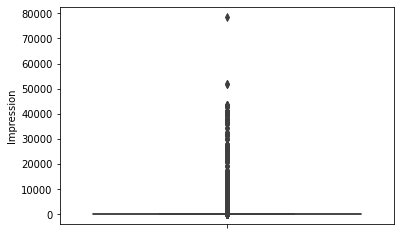

In [20]:
sns.boxplot(data=bidding, y="Impression")

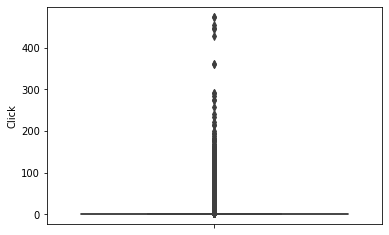

In [21]:
sns.boxplot(data=bidding, y="Click")

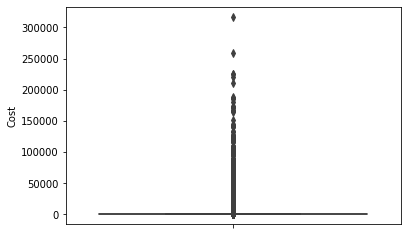

In [22]:
sns.boxplot(data=bidding, y="Cost")

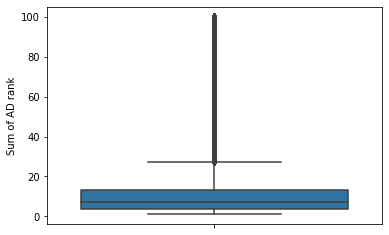

In [23]:
sns.boxplot(data=bidding, y="Sum of AD rank")

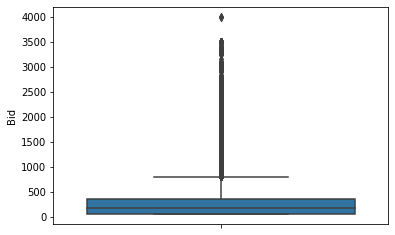

In [25]:
sns.boxplot(data=bidding, y="Bid")

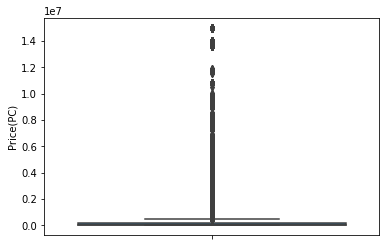

In [26]:

sns.boxplot(data=bidding, y="Price(PC)")

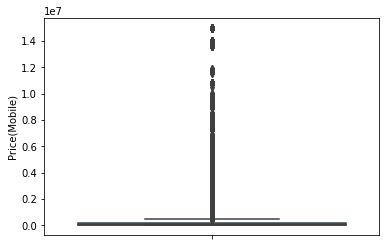

In [27]:
sns.boxplot(data=bidding, y="Price(Mobile)")

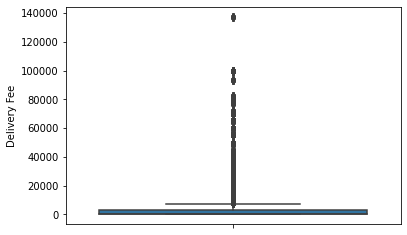

In [28]:

sns.boxplot(data=bidding, y="Delivery Fee")

# log 데이터 이상치 

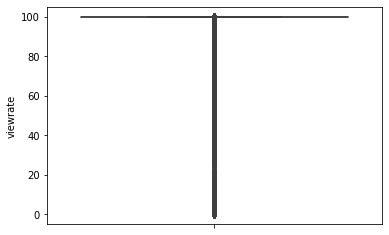

In [33]:
sns.boxplot(data=log, y="viewrate")

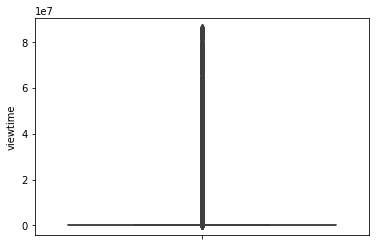

In [32]:
sns.boxplot(data=log, y="viewtime")

# 데이터 종류 및 수 

In [35]:
# bidding
column_names = bidding.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

type(column_names)
print(column_names, "\n")

for i in column_names:
     print(f"{i} = {bidding[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

['index', 'Impression', 'Click', 'Cost', 'Sum of AD rank', 'Bid', 'Price(PC)', 'Price(Mobile)', 'Delivery Fee', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'date'] 

index = 33493
Impression = 2488
Click = 172
Cost = 2089
Sum of AD rank = 81454
Bid = 274
Price(PC) = 6455
Price(Mobile) = 6455
Delivery Fee = 105
Category Name 1 = 9
Category Name 2 = 58
Category Name 3 = 203
Category Name 4 = 734
date = 57


In [40]:
# bidding
column_names = bidding.columns.values.tolist() 

for i in column_names:
     print(f"{i} = {bidding[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

index = [3575092 3575637 4129259 ... 2566795 2566880 2566923]
Impression = [   3    6    7 ... 8125 1957 1590]
Click = [  0   2   3  15  12   1   4   8   5   6  14  10   7  13  11  22  26  17
  27  16  18  19  39  25   9  35  74  59  50  33  21  37  24  23  67  38
  42  28  31  32  41  36  47 145  43  20  29  82  85 150  34  45  49  56
  75  61 123  30  46  68  86  60  63  79  51  48  97  44  58  40  88  94
  52  53  90 109 101  78  83 138  96  57 129  80  55  89 117 100  77 361
 121 360  54  66 107  65 120  95 136 146  64 147  71 180  92  93 124  62
  91 214  81 118 113  76  70 141 275 102 104 157 142 474 134 105 130  69
 128 111 292 132 103 175 135  72 119 193  84 176 187 195 240 257 177 156
 152 115 112 122 444 148 234  99 200 160 127 151  98 170 106 159 149 163
 162 178 285 448 144 221 429 108 183 455]
Cost = [    0.   200.  1000. ... 29160. 15800. 10160.]
Sum of AD rank = [3.         3.33333333 8.         ... 4.67475728 2.41059603 5.44537815]
Bid = [  50  230  500  120  300  400  

In [41]:
# log 데이터
column_names = log.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

type(column_names)
print(column_names, "\n")


for i in column_names:
     print(f"{i} = {log[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

['uid', 'action_type', 'category1', 'category2', 'category3', 'collect_time', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime'] 

uid = 662670
action_type = 5
category1 = 2655
category2 = 548
category3 = 1683
collect_time = 680550
geoip_city_name = 2262
useragent_os = 12
viewrate = 1646
viewtime = 244539


In [ ]:
# log 데이터
column_names = log.columns.values.tolist() 

for i in column_names:
     print(f"{i} = {log[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

uid = ['avpKyWMn/xEADNlb' '0+5vEmGkOuAAB5j2' 'r8DXy2OtSl8AAojG' ...
 'dusqTmOtPa8AB46D' 'AeCSamOsMCsACJDD' 'PUpxWWMWdcIACR2B']
action_type = ['View' 'Basket' 'Highlight' 'Copy' 'SINF']
category1 = ['주방용품' '패브릭' '데코·식물' ... '홀러' '올리그로우' '톰의다락방']
category2 = ['그릇·홈세트' '매트' '커튼·부자재' '플라워·식물' '진열장·책장' '화장대·테이블정리' '꾸미기팁' '테이블·식탁·책상'
 '유산소' '침대' '유아동패브릭' '러그·카페트' '욕실용품' '홈갤러리' '이불·이불솜' '서랍·수납장' '토퍼·패드' '전기'
 '소파' '행거·옷장' '블라인드·롤스크린' '거실장·TV장' '거울' '세탁기·건조기' '청소기' '페인트·부자재'
 '무드등·장식조명' '보관·용기·도시락' '냉장고' '세탁세제·유연제' '인테리어소품' '강아지' '공간별조명' '단스탠드'
 '계절가전' '홈패브릭' '지식백과' '의자' '청소' '주방가전' '가구' '컴퓨터·노트북' '생활정보' '가벽·파티션'
 '옷정리·이불정리' '컵·잔·텀블러' '청소용품' '데코·식물' '수건·타월' '손잡이·방문·유리' '캠핑주방용품'
 '주방수납·정리' '보호대' '수납' '냄비·프라이팬·솥' 'DIY·취미·공예' '반려동물' '의자·소파' '주방용품' '양치용품'
 '매트리스·토퍼' '수저·커트러리' '화장대·콘솔' '제습·탈취·방향제' '유아용패브릭' '베개·베개커버' '밀키트' '생활잡화'
 '벽지·시트지' 'DIY&리폼' '장스탠드' '서랍장·트롤리' '완구·교구' '소파·생활커버' '디퓨저·캔들' '캠핑생활용품'
 '캠핑가구' '세탁용품' '선반' '크리스마스' '음향가전' '리빙박스·바구니' '휴대폰' '쿠션·방석' '타일·파벽돌'
 '생수·음료·커피' '식기건조대' '고양이' '형광등·

# 파생변수

In [44]:
bidding["CTR"] = (bidding["Click"]/bidding["Impression"]) * 100
bidding["CPC"] = (bidding["Cost"]/bidding["Click"])
bidding["CPM"] = (bidding["Cost"]/1000)

In [ ]:
# sns.pairplot(bidding)
# plt.show()

변수간의 상관관계

In [45]:
# bidding.cov()
bidding.corr(method='pearson')

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,date,CTR,CPC,CPM
index,1.000000,-0.001893,-0.003031,-0.003754,-0.014654,0.013104,-0.100588,-0.100588,-0.000640,-0.010660,0.009017,-0.081329,-0.003754
Impression,-0.001893,1.000000,0.411630,0.368013,-0.057038,0.081982,0.008791,0.008791,-0.003171,-0.005185,-0.002644,0.110532,0.368013
Click,-0.003031,0.411630,1.000000,0.738737,-0.111125,0.090511,0.015979,0.015979,-0.009131,-0.005401,0.121462,0.099799,0.738737
Cost,-0.003754,0.368013,0.738737,1.000000,-0.053692,0.141317,0.007772,0.007772,-0.005802,-0.005663,0.040441,0.321240,1.000000
Sum of AD rank,-0.014654,-0.057038,-0.111125,-0.053692,1.000000,0.042989,-0.030730,-0.030730,0.011096,0.017619,-0.067095,0.136987,-0.053692
Bid,0.013104,0.081982,0.090511,0.141317,0.042989,1.000000,-0.041760,-0.041760,-0.000520,0.062180,-0.013132,0.559248,0.141317
Price(PC),-0.100588,0.008791,0.015979,0.007772,-0.030730,-0.041760,1.000000,1.000000,-0.029295,-0.017691,-0.012058,-0.007552,0.007772
Price(Mobile),-0.100588,0.008791,0.015979,0.007772,-0.030730,-0.041760,1.000000,1.000000,-0.029295,-0.017691,-0.012058,-0.007552,0.007772
Delivery Fee,-0.000640,-0.003171,-0.009131,-0.005802,0.011096,-0.000520,-0.029295,-0.029295,1.000000,0.005784,0.002013,-0.001677,-0.005802
date,-0.010660,-0.005185,-0.005401,-0.005663,0.017619,0.062180,-0.017691,-0.017691,0.005784,1.000000,-0.001949,-0.019420,-0.005663


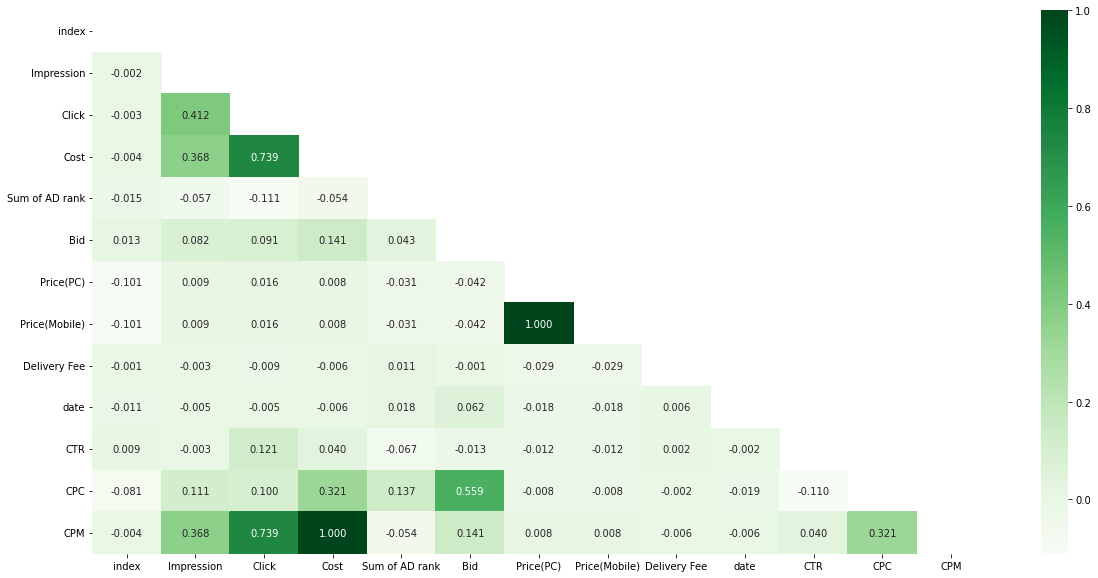

In [46]:
mask = np.zeros_like(bidding.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = bidding.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')

제일 관련 있는 상관 관계 변수: click, cost, cpc, Bid, impression, cpm


Click
0      693228
1      128746
2       44264
3       20863
4       11730
        ...  
429         1
444         1
448         1
455         1
474         2
Length: 172, dtype: int64


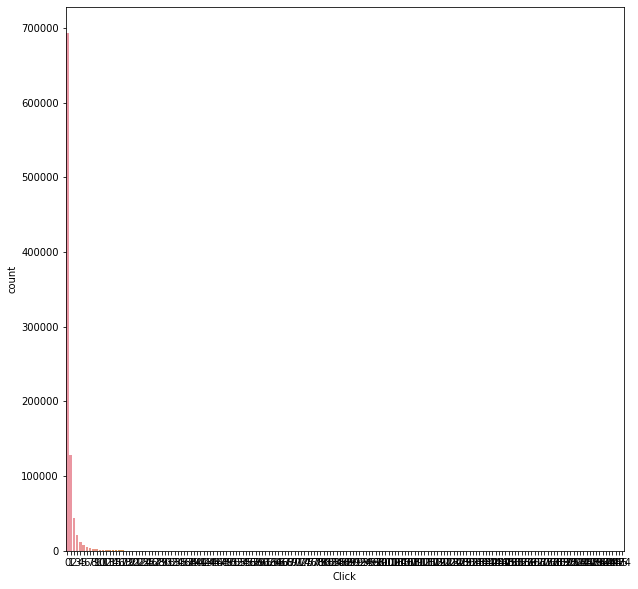

In [ ]:
# Click 데이터 살펴보기
print(bidding.groupby('Click').size())
plt.figure(figsize=(10,10))
sns.countplot(data=bidding.iloc[:,:], x='Click')
plt.show()


In [ ]:
print(bidding.groupby(['Click','Cost']).CPC.size())
plt.figure(figsize=(10,10))
sns.countplot(data=bidding, x='Click', hue='Cost')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(bidding.groupby(['Impression','Click']).CPC.size())
plt.figure(figsize=(10,10))
sns.countplot(data=bidding, x='Impression', hue='Cost')
plt.show()

Impression  Click
1           0        102672
            1          1510
            2             1
2           0         73534
            1          2474
                      ...  
43174       19            1
43585       16            2
43680       24            2
51982       28            2
78607       448           1
Name: CPC, Length: 14106, dtype: int64


Text(0.5, 1.0, 'Click')

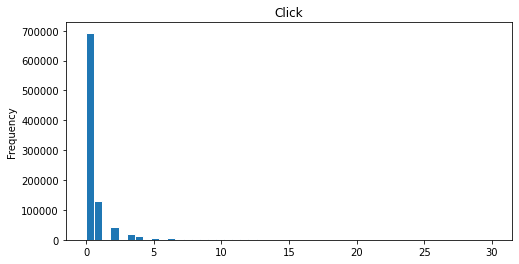

In [ ]:
bidding.Click.plot.hist(bins=50, figsize=(8,4), edgecolor='white',range=[0,30])
plt.title('Click')

# 두 변수 간 시각화

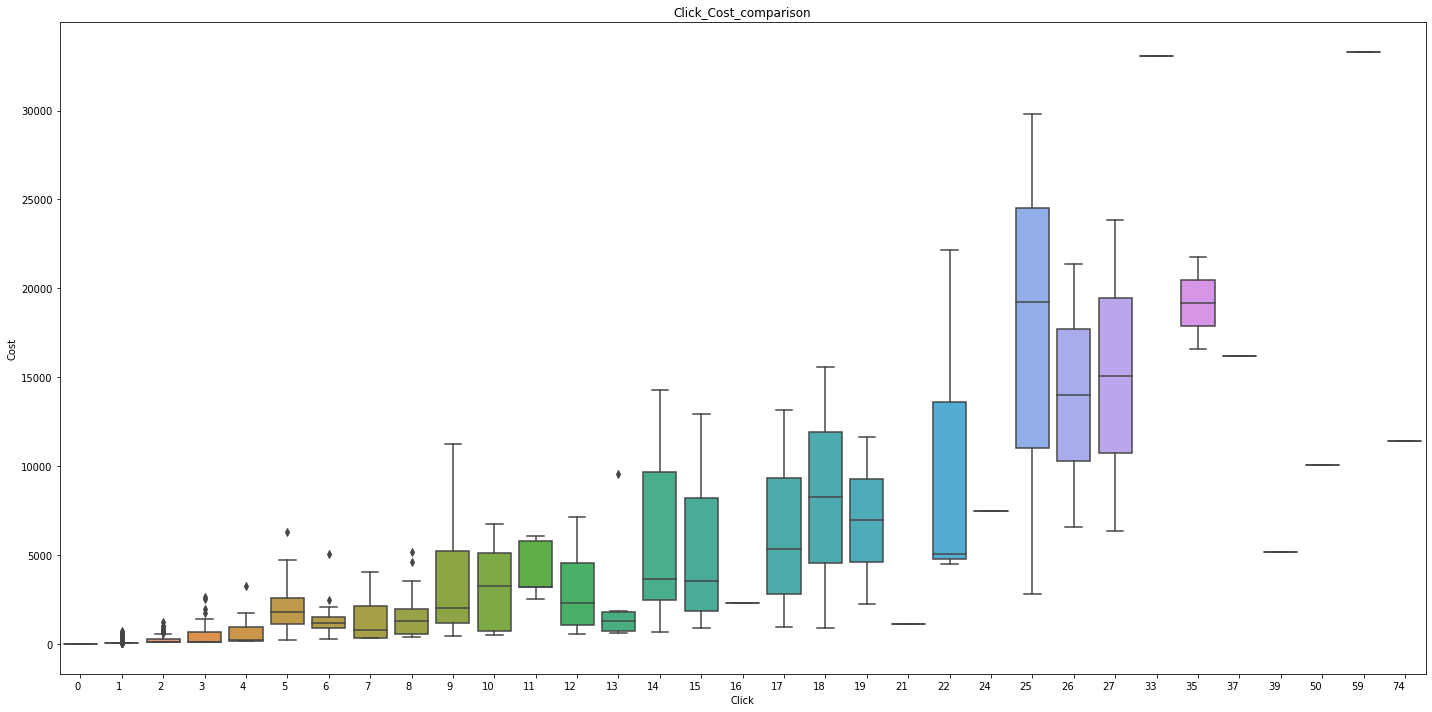

In [48]:
ax = sns.boxplot(x="Click", y="Cost", data=bidding.iloc[:1000,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Click_Cost_comparison')

plt.tight_layout()
plt.show()

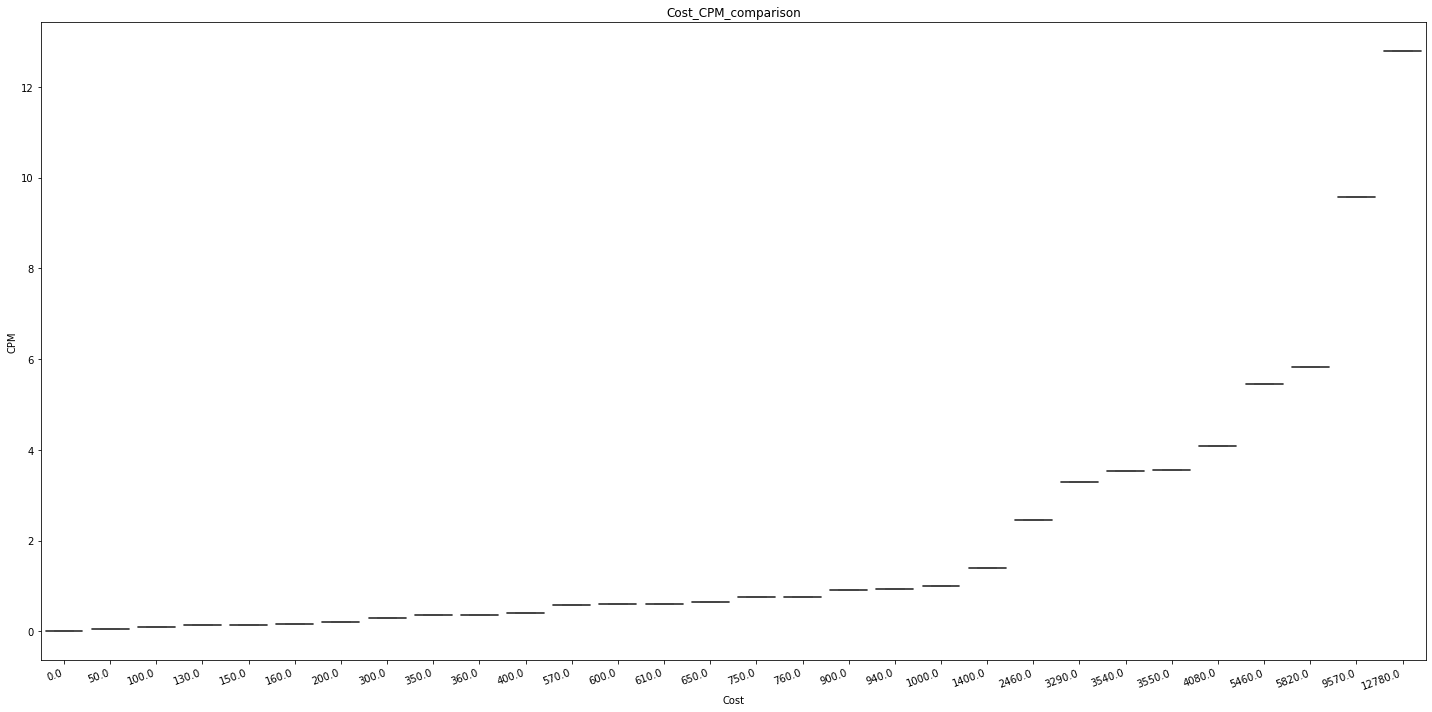

In [50]:
ax = sns.boxplot(x="Cost", y="CPM", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_title('Cost_CPM_comparison')

plt.tight_layout()
plt.show()

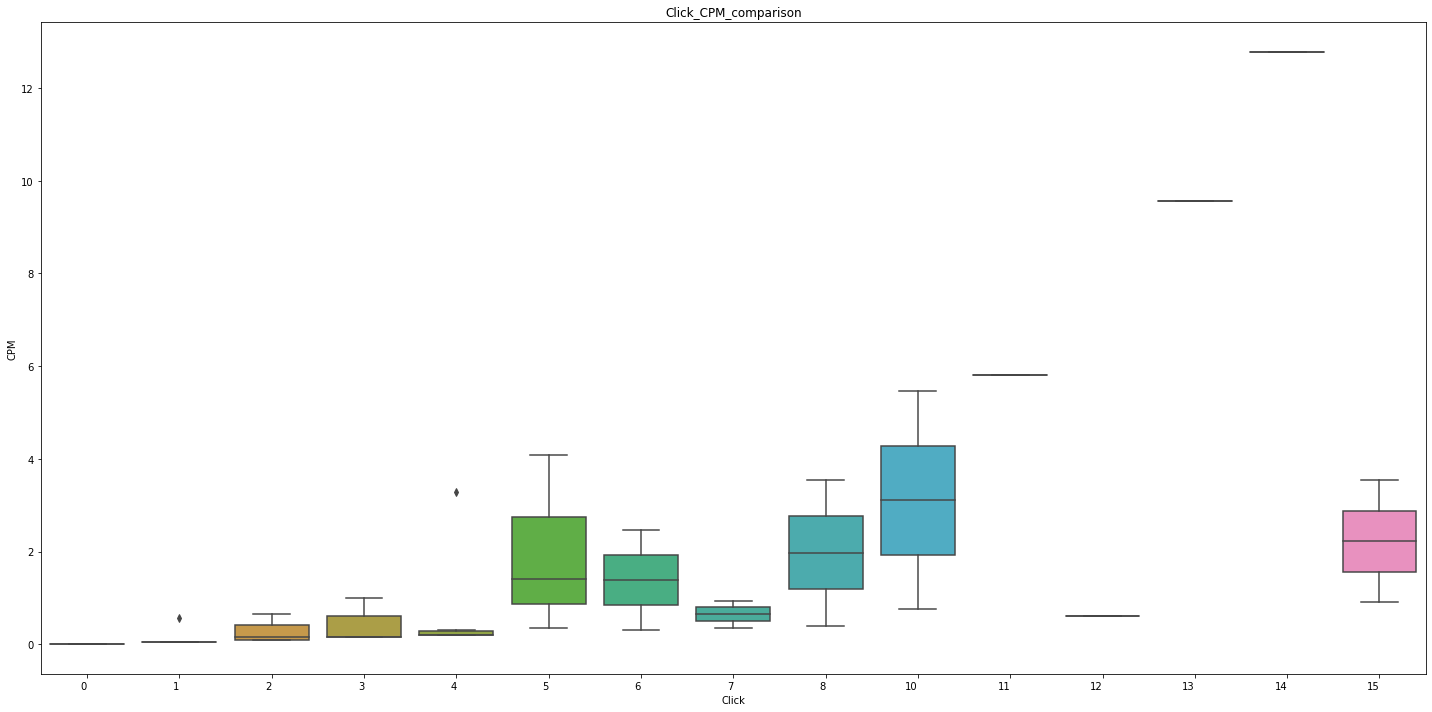

In [52]:
ax = sns.boxplot(x="Click", y="CPM", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Click_CPM_comparison')

plt.tight_layout()
plt.show()

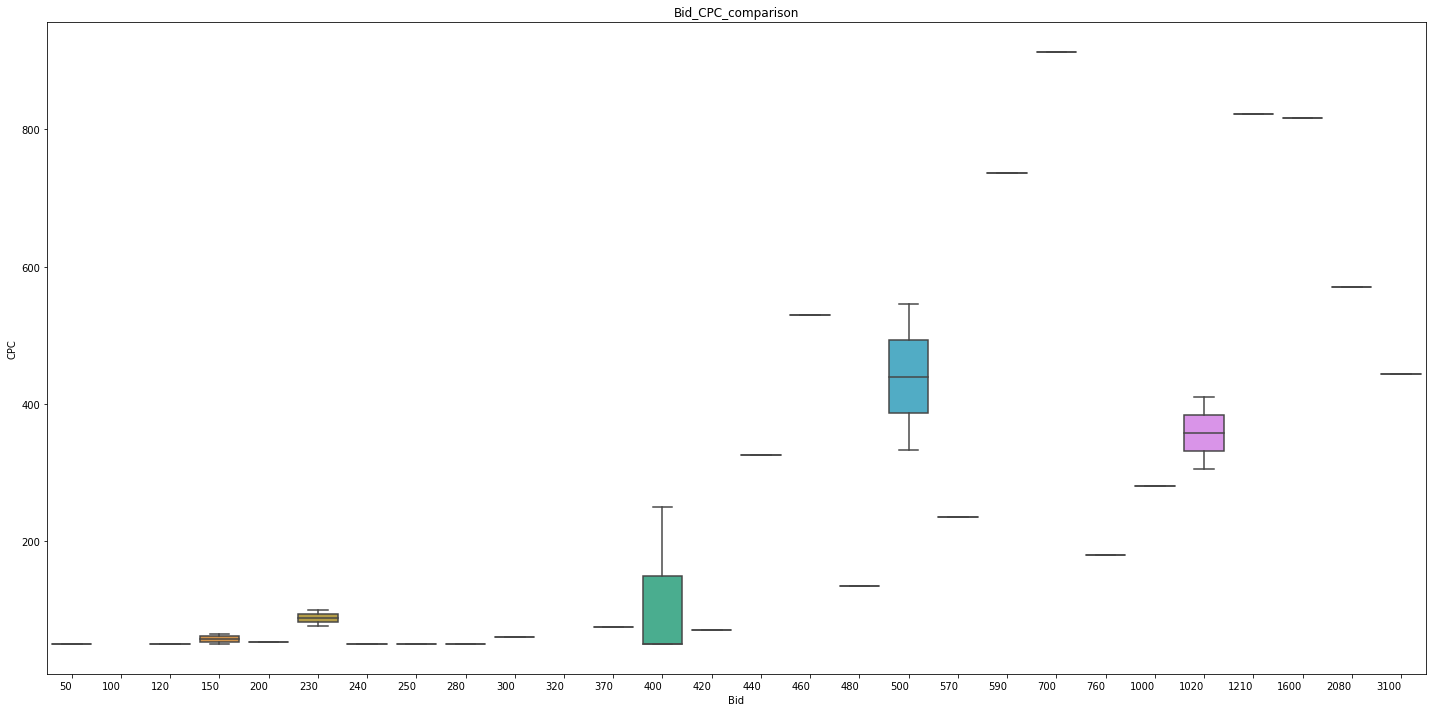

In [53]:
ax = sns.boxplot(x="Bid", y="CPC", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Bid_CPC_comparison')

plt.tight_layout()
plt.show()

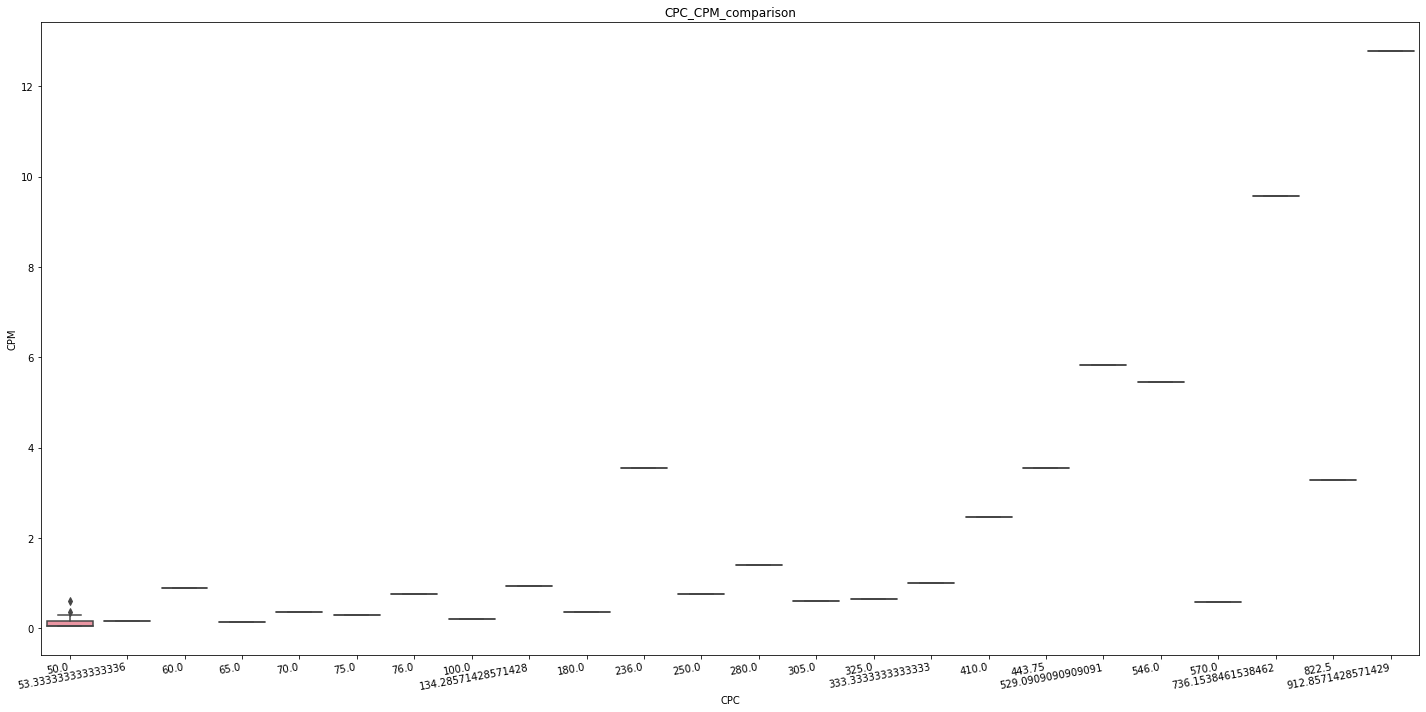

In [61]:
ax = sns.boxplot(x="CPC", y="CPM", data=bidding.iloc[:90,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
ax.set_title('CPC_CPM_comparison')

plt.tight_layout()
plt.show()

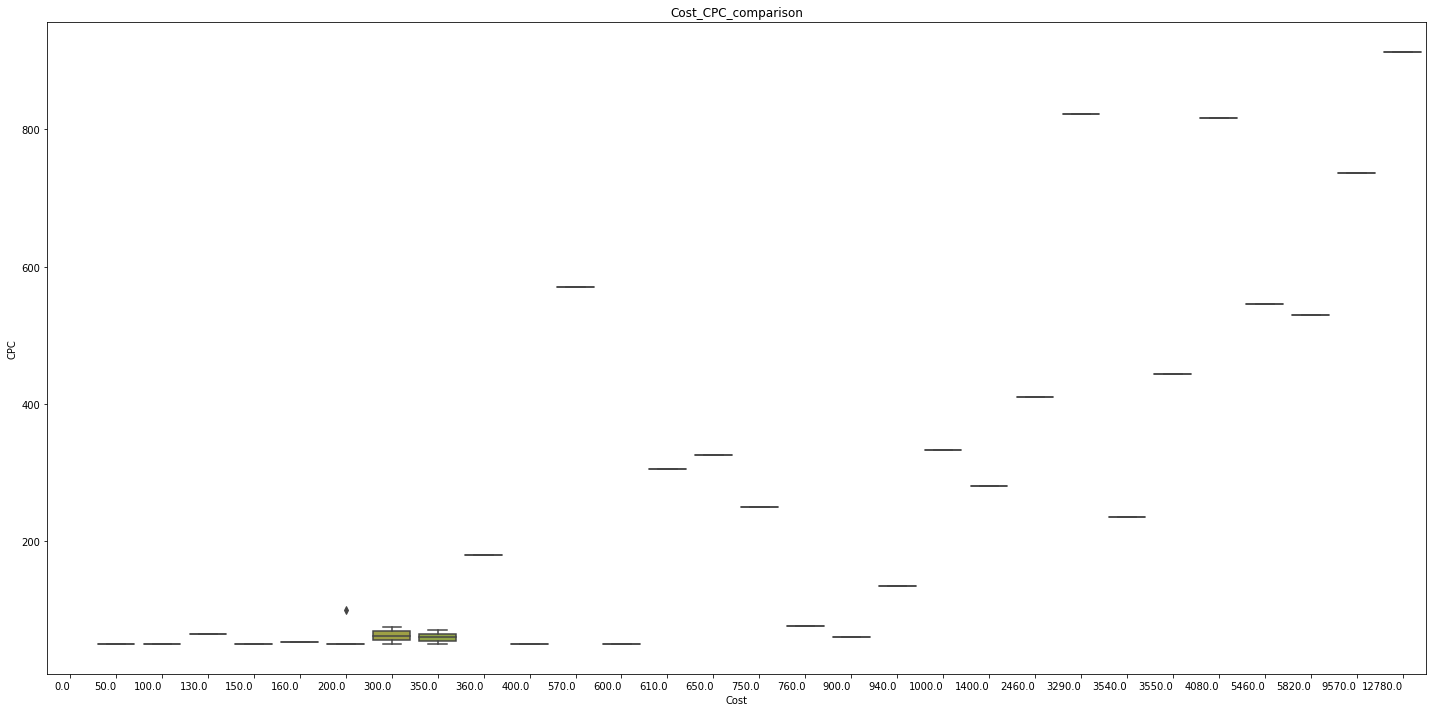

In [62]:
ax = sns.boxplot(x="Cost", y="CPC", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Cost_CPC_comparison')

plt.tight_layout()
plt.show()

In [ ]:
bidding.pivot(),.query(date="20221031")


In [ ]:
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
log.isnull().sum()

uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
log = log.dropna()

In [ ]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


action_type
Basket        147510
Copy           90052
Highlight     352284
SINF           17919
View         3757234
dtype: int64


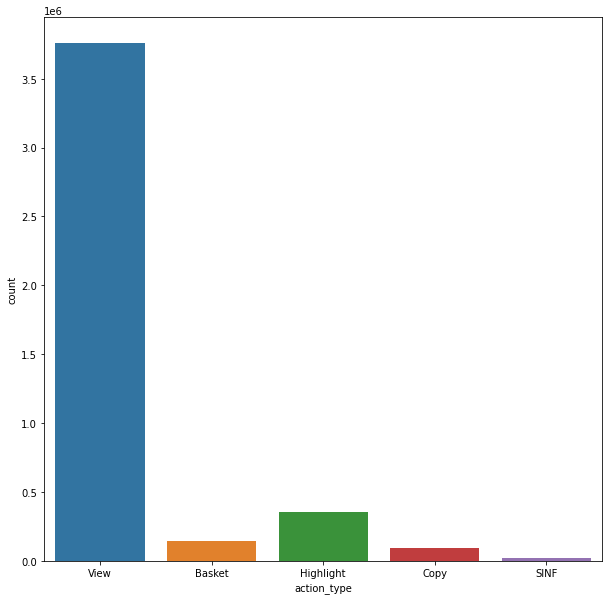

In [ ]:
# log
print(log.groupby('action_type').size())
plt.figure(figsize=(10,10))
sns.countplot(data=log.iloc[:,:], x='action_type')
plt.show()

useragent_os
Android       828055
CentOS            46
Chrome OS        838
Fedora             2
FreeBSD            1
Linux           7382
Mac OS X      263421
Other            212
Tizen            128
Ubuntu           183
Windows      2775801
iOS           488930
dtype: int64


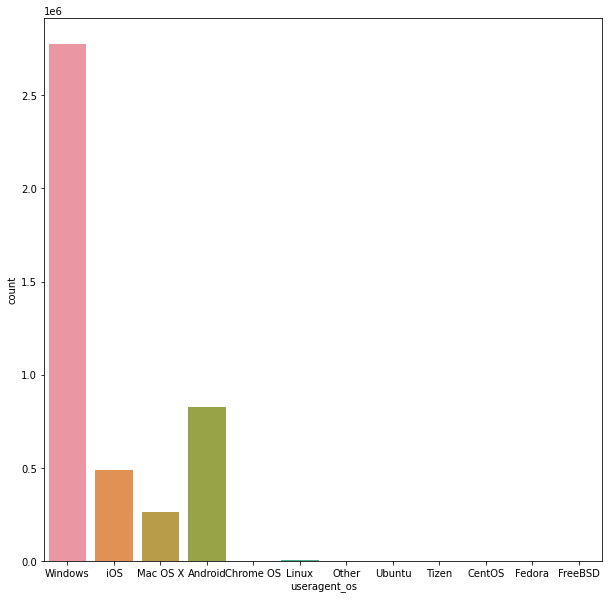

In [ ]:
# log
print(log.groupby('useragent_os').size())
plt.figure(figsize=(10,10))
sns.countplot(data=log.iloc[:,:], x='useragent_os')
plt.show()

In [ ]:
# 데이터 낮은값 제거
mask = log['useragent_os'].isin(['CentOS', "Chrome OS", "Fedora", "FreeBSD", "Linux", "Other", "Tizen", "Ubuntu"])
log = log[~mask]

In [ ]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
def category_len(data):

    return len(data)

category_len()

930126